各距离范围中连边数量大于 0 的元组个数： [8506, 7677, 5069, 3063, 1457, 573, 210, 97, 26, 6]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


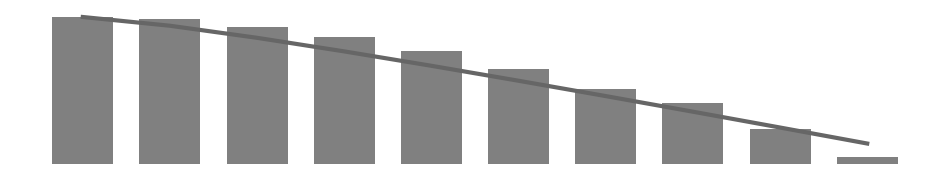

In [2]:
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

def linear_func_ky(x):
    x = np.array(x)
    return 5620.0 * np.power((x + 1.0), 0.75) * np.exp(x / -5.5)

x_data = []
y_data = []

state = 'KY'
city = 'Louisville'
date = '12-27'

with open(f'{state}_{city}_{date}_Rij.json', 'r', encoding='utf-8') as f:
    Rij_dict = json.load(f)

with open(f'Aij_{state}_{city}_{date}.json', 'r', encoding='utf-8') as f:
    Aij_dict = json.load(f)

coordinate_list = []

for k, v in Rij_dict.items():
    for i in range(len(v)):
        coordinate_tuple = (Rij_dict[k][i], Aij_dict[k][i])
        coordinate_list.append(coordinate_tuple)



# 创建 16 个列表，用于存储不同距离范围的元组
groups = [[] for _ in range(10)]  # 16 个空列表，对应 0-5, 5-10, ..., 75-80

# 根据距离将元组分组
for distance, edge_count in coordinate_list:
    if 0 <= distance < 5:
        groups[0].append((distance, edge_count))
    elif 5 <= distance < 10:
        groups[1].append((distance, edge_count))
    elif 10 <= distance < 15:
        groups[2].append((distance, edge_count))
    elif 15 <= distance < 20:
        groups[3].append((distance, edge_count))
    elif 20 <= distance < 25:
        groups[4].append((distance, edge_count))
    elif 25 <= distance < 30:
        groups[5].append((distance, edge_count))
    elif 30 <= distance < 35:
        groups[6].append((distance, edge_count))
    elif 35 <= distance < 40:
        groups[7].append((distance, edge_count))
    elif 40 <= distance < 45:
        groups[8].append((distance, edge_count))
    elif 45 <= distance < 50:
        groups[9].append((distance, edge_count))

# 统计每个组中第二个元素（连边数量）大于 0 的个数
result_list = []
for group in groups:
    count = sum(1 for _, edge_count in group if edge_count > 0)
    result_list.append(count)

# 打印结果以验证
print("各距离范围中连边数量大于 0 的元组个数：", result_list)
x = [str(i) for i in range(1, 11)]

x1 = list(np.arange(0, 10, 1))
x1_5 = [x * 5 for x in x1]
x1_5_plus5 = [x + 5 for x in x1_5]

print(x)
print(x1)
print(x1_5_plus5)

plt.figure(figsize=(12, 2))
plt.bar(x, result_list, color='grey', width=0.7)
plt.plot(x1, linear_func_ky(x1_5_plus5), color='#666666', linestyle='-', linewidth=3.0,zorder=10)
plt.yscale('log')
plt.xticks([])  # 隐藏 x 轴刻度标签
plt.yticks([])  # 隐藏 y 轴刻度标签
plt.axis('off')

plt.savefig('fig1补充/fig1-c.svg', format='svg', bbox_inches='tight')
plt.show()